### Función que detecta una nota musical mediante análisis de Fourier

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fftpack import fft, fftfreq
import librosa

### Creación de la función principal

In [8]:
def nota(audio):
    y , sr = librosa.load(audio)
    
    L = len(y)
    t = np.arange(0,L) / sr
    
    plt.figure(figsize = (10,4))
    
    plt.plot(t,y)
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.show()
    
    gk = fft(y)
    M_gk = abs(gk)
    M_gk = M_gk[0:L//2]

    Ph_gk = np.angle(gk)
    F = sr*np.arange(0 , L//2) / L

    plt.figure(figsize = (10,4))
    
    plt.plot(F , M_gk)
    plt.grid()
    plt.xlabel('Frecuency $[Hz]$')
    plt.ylabel('Amplitude')
    plt.xscale('log')
    plt.show()
    
    frec = F[int(np.where(M_gk == np.max(M_gk))[0])]
        
    def frecuencias(frecuencia):
        frecs = []
        mult = [4, 2, 1.75, 1.5, 1.33, 1.25]
        frecs.append(frecuencia)
        for i in range(len(mult)):
            a = frecuencia*mult[i]
            b = frecuencia/mult[i]
            frecs.append(a)
            frecs.append(b)
            frecs.sort()
        return frecs
    
    notas = pd.DataFrame()

    notas['DO'] = frecuencias(261.6)
    notas['DO#'] = frecuencias(277.2)
    notas['RE'] = frecuencias(293.7)
    notas['RE#'] = frecuencias(311.1)
    notas['MI'] = frecuencias(329.63)
    notas['FA'] = frecuencias(349.2)
    notas['FA#'] = frecuencias(364)
    notas['SOL'] = frecuencias(392)
    notas['SOL#'] = frecuencias(415.3)
    notas['LA'] = frecuencias(440)
    notas['LA#'] = frecuencias(446)
    notas['SI'] = frecuencias(493.9)

    for i in range(len(notas.LA)):
        for j in range(len(notas.columns)):
            nota = notas.iloc[i][j]
        
            if frec < nota + 0.6 and frec > nota - 0.6:
                print(f'La nota es {notas.columns[j]}')

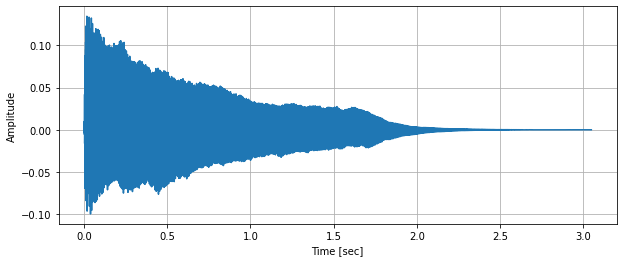

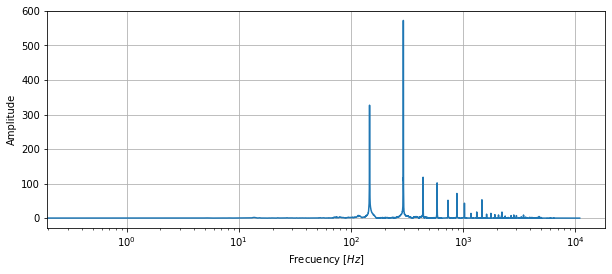

La nota es SOL
La nota es RE


In [9]:
nota('notes/RE.wav')

## Pruebas individuales

In [4]:
y , sr = librosa.load('notes/RE.wav')

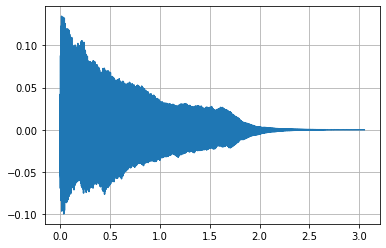

In [6]:
L = len(y)

t = np.arange(0,L) / sr

plt.plot(t,y)

plt.grid()

(0.0, 2000.0)

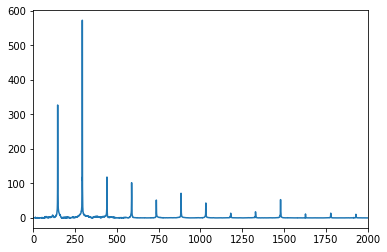

In [7]:
gk = fft(y)
M_gk = abs(gk)
M_gk = M_gk[0:L//2]

Ph_gk = np.angle(gk)
F = sr*np.arange(0 , L//2) / L

plt.plot(F , M_gk)
# plt.axvline( notas['FA#'][6] , color = 'black')
# plt.xscale('log')
plt.xlim(0,2000)

In [8]:
frec = F[int(np.where(M_gk == np.max(M_gk))[0])]
        
def frecuencias(frecuencia):
    frecs = []
    mult = [4, 2, 1.75, 1.5, 1.33, 1.25]
    frecs.append(frecuencia)
    for i in range(len(mult)):
        a = frecuencia*mult[i]
        b = frecuencia/mult[i]
        frecs.append(a)
        frecs.append(b)
        frecs.sort()
    return frecs

In [54]:
frec

261.4409485385888

In [9]:
notas = pd.DataFrame()

notas['DO'] = frecuencias(261.6)
notas['DO#'] = frecuencias(277.2)
notas['RE'] = frecuencias(293.7)
notas['RE#'] = frecuencias(311.1)
notas['MI'] = frecuencias(329.63)
notas['FA'] = frecuencias(349.2)
notas['FA#'] = frecuencias(364)
notas['SOL'] = frecuencias(392)
notas['SOL#'] = frecuencias(415.3)
notas['LA'] = frecuencias(440)
notas['LA#'] = frecuencias(446)
notas['SI'] = frecuencias(493.9)


for i in range(len(notas.LA)):
    for j in range(len(notas.columns)):
        nota = notas.iloc[i][j]
        
        if frec < (nota + 1) and frec > (nota - 1):
            print(f'La nota es {notas.columns[j]}')

La nota es LA
La nota es SOL
La nota es RE


In [26]:
notas

,DO,DO#,RE,RE#,MI,FA,FA#,SOL,SOL#,LA,LA#,SI
0,65.400000,69.300000,73.425000,77.775000,82.407500,87.300000,91.000000,98.000000,103.825000,110.000000,111.500000,123.475000
1,130.800000,138.600000,146.850000,155.550000,164.815000,174.600000,182.000000,196.000000,207.650000,220.000000,223.000000,246.950000
2,149.485714,158.400000,167.828571,177.771429,188.360000,199.542857,208.000000,224.000000,237.314286,251.428571,254.857143,282.228571
3,174.400000,184.800000,195.800000,207.400000,219.753333,232.800000,242.666667,261.333333,276.866667,293.333333,297.333333,329.266667
4,196.691729,208.421053,220.827068,233.909774,247.842105,262.556391,273.684211,294.736842,312.255639,330.827068,335.338346,371.353383
5,209.280000,221.760000,234.960000,248.880000,263.704000,279.360000,291.200000,313.600000,332.240000,352.000000,356.800000,395.120000
6,261.600000,277.200000,293.700000,311.100000,329.630000,349.200000,364.000000,392.000000,415.300000,440.000000,446.000000,493.900000
7,327.000000,346.500000,367.125000,388.875000,412.037500,436.500000,455.000000,490.000000,519.125000,550.000000,557.500000,617.375000
8,347.928000,368.676000,390.621000,413.763000,438.407900,464.436000,484.120000,521.360000,552.349000,585.200000,593.180000,656.887000
9,392.400000,415.800000,440.550000,466.650000,494.445000,523.800000,546.000000,588.000000,622.950000,660.000000,669.000000,740.850000


In [ ]:
for i in range(len(notas.LA)):
    for j in range(len(notas.columns)):
        nota = notas.iloc[i][j]
        print('')